In [1]:
library(ISLR)
library(MASS)
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.4
v tidyr   0.8.0     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()


In [2]:
dim(Caravan)

[1] 5822   86

In [3]:
attach(Caravan)

In [4]:
summary(Purchase)

No  Yes 
5474  348

In [5]:
standardized.X <- scale(Caravan[, -86])

In [8]:
var(standardized.X[, 1])

[1] 1

In [19]:
library(class)

In [20]:
test <- 1:1000
train.X <- standardized.X[-test,]
test.X <- standardized.X[test,]
train.Y <- Purchase[-test]
test.Y <- Purchase[test]
set.seed(1)
knn.pred <- knn(train.X, test.X, train.Y, k=1)

In [22]:
mean(test.Y != knn.pred)

[1] 0.118

In [24]:
table(knn.pred, test.Y)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

In [25]:
glm.fit <- glm(Purchase ~ ., data = Caravan, family = binomial, subset = -test)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [26]:
glm.probs <- predict(glm.fit, Caravan[test,], type = 'response')

In [28]:
glm.pred.25 <- ifelse(glm.probs > 0.25, 'Yes', 'No')
table(glm.pred.25, test.Y)

           test.Y
glm.pred.25  No Yes
        No  919  48
        Yes  22  11

# 10

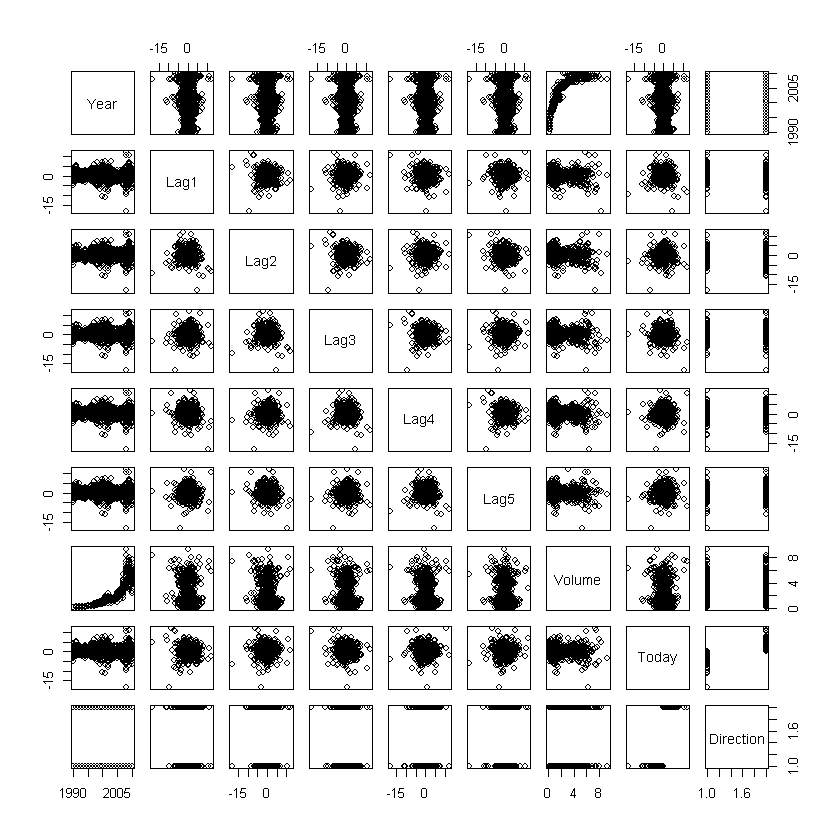

In [2]:
pairs(Weekly)

In [3]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [27]:
logistic <- glm(Direction ~ . - Year - Today, data = Weekly, family = binomial)

In [11]:
summary(logistic)


Call:
glm(formula = Direction ~ . - Year - Today, family = binomial, 
    data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [18]:
contrasts(Weekly$Direction)

,Up
Down,0
Up,1


In [32]:
y.pred.logistic <- ifelse(predict(logistic, type = 'response') > 0.5, 'Up', 'Down')
table(y.pred.logistic, Weekly$Direction)

               
y.pred.logistic Down  Up
           Down   54  48
           Up    430 557

In [75]:
mean(y.pred.logistic == Weekly$Direction)

[1] 0.5610652

## d

In [60]:
attach(Weekly)

The following objects are masked from Weekly (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



In [87]:
train <- Year >= 1990 & Year <= 2008

In [100]:
Weekly.train <- Weekly[train, ]
Weekly.test <- Weekly[!train, ]

In [112]:
m1 <- glm(Direction ~ . - Year - Today, data = Weekly.train, family = binomial)
summary(m1)


Call:
glm(formula = Direction ~ . - Year - Today, family = binomial, 
    data = Weekly.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7186  -1.2498   0.9823   1.0841   1.4911  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.33258    0.09421   3.530 0.000415 ***
Lag1        -0.06231    0.02935  -2.123 0.033762 *  
Lag2         0.04468    0.02982   1.499 0.134002    
Lag3        -0.01546    0.02948  -0.524 0.599933    
Lag4        -0.03111    0.02924  -1.064 0.287241    
Lag5        -0.03775    0.02924  -1.291 0.196774    
Volume      -0.08972    0.05410  -1.658 0.097240 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1342.3  on 978  degrees of freedom
AIC: 1356.3

Number of Fisher Scoring iterations: 4


In [113]:
y.pred1 <- ifelse(predict(m1, Weekly.test, type = 'response') > 0.5, 'Up', 'Down')
table(y.pred1, Weekly.test$Direction)

       
y.pred1 Down Up
   Down   31 44
   Up     12 17

In [108]:
mean(y.pred1 == Weekly.test$Direction)

[1] 0.4615385

In [114]:
m2 <- glm(Direction ~ Lag2, data = Weekly.train, family = binomial)
summary(m2)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly.train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [115]:
y.pred2 <- ifelse(predict(m2, Weekly.test, type = 'response') > 0.5, 'Up', 'Down')
table(y.pred2, Weekly.test$Direction)

       
y.pred2 Down Up
   Down    9  5
   Up     34 56

In [116]:
mean(y.pred2 == Weekly.test$Direction)

[1] 0.625

### LDA

In [117]:
m3 <- lda(Direction ~ Lag2, data = Weekly.train)

In [136]:
y.pred3 <- predict(m3, Weekly.test)$class
table(y.pred3, Weekly.test$Direction)

       
y.pred3 Down Up
   Down    9  5
   Up     34 56

In [137]:
mean(y.pred3 == Weekly.test$Direction)

[1] 0.625

In [138]:
?lda

### QDA

In [131]:
m4 <- qda(Direction ~ Lag2, data = Weekly.train)

In [132]:
y.pred4 <- ifelse(predict(m4, Weekly.test)$posterior[, 2] >= 0.5, 'Up', 'Down')
table(y.pred4, Weekly.test$Direction)

       
y.pred4 Down Up
     Up   43 61

In [133]:
mean(y.pred4 == Weekly.test$Direction)

[1] 0.5865385

### KNN

In [139]:
library(class)

In [159]:
X.train <- matrix(Weekly[train, 'Lag2'])
X.test <- matrix(Weekly[!train, 'Lag2'])
y.train <- Weekly[train, 'Direction']
y.test <- Weekly[!train, 'Direction']

In [160]:
set.seed(1)
m5 <- knn(X.train, X.test, y.train, k = 1)

In [161]:
table(m5, y.test)

      y.test
m5     Down Up
  Down   21 30
  Up     22 31

In [162]:
mean(m5 == y.test)

[1] 0.5

In [187]:
set.seed(1)
m6 <- knn(X.train, X.test, y.train, k = 9)
table(m6, y.test)
mean(m6 == y.test)

      y.test
m6     Down Up
  Down   17 20
  Up     26 41

[1] 0.5576923

# 11

In [240]:
Auto$mpg01 <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


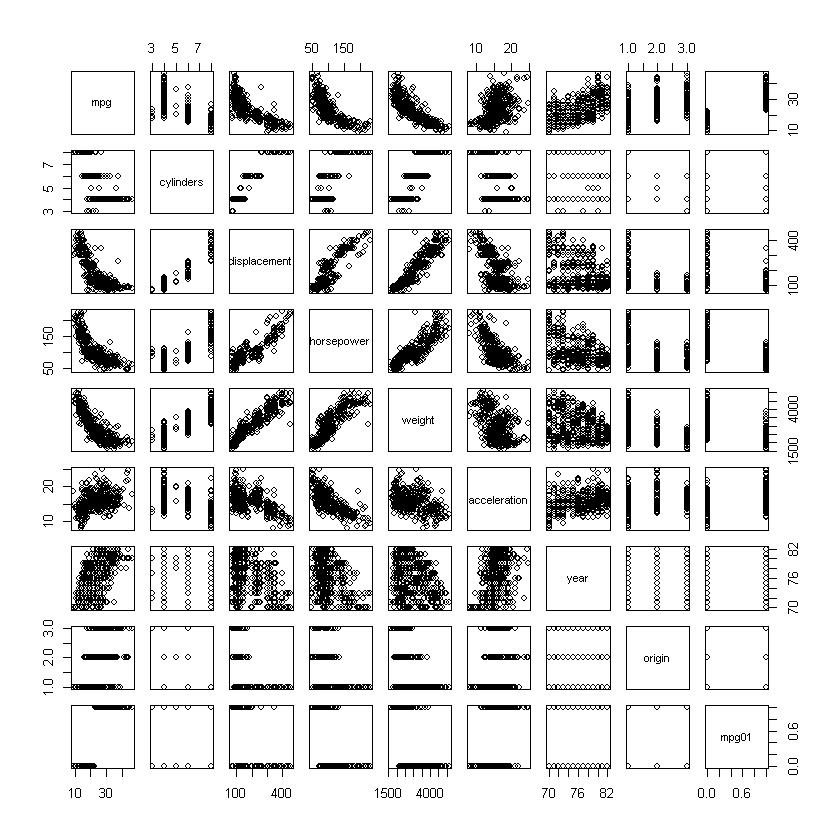

In [241]:
pairs(Auto[, -9])

In [314]:
nrow(Auto)

[1] 392

In [288]:
set.seed(1)
train.indicies <- sample(1:nrow(Auto), 250, replace = FALSE)
train <- as.numeric(rownames(Auto)) %in% train.indicies
Auto.train <- Auto1[train,]
Auto.test <- Auto1[!train,]
dim(Auto.train)
dim(Auto.test)

[1] 250   9

[1] 142   9

In [258]:
head(Auto.train)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
4,16,8,304,150,3433,12.0,70,1,0
5,17,8,302,140,3449,10.5,70,1,0
8,14,8,440,215,4312,8.5,70,1,0
9,14,8,455,225,4425,10.0,70,1,0
10,15,8,390,190,3850,8.5,70,1,0
15,24,4,113,95,2372,15.0,70,3,1


In [265]:
Auto1 <- Auto[, -9]

In [269]:
Auto1$mpg01 <- as.factor(Auto1$mpg01)

In [270]:
contrasts(Auto1$mpg01)

,1
0,0
1,1


In [320]:
m6 <- glm(mpg01 ~ . - mpg, family = binomial, data = Auto1)
summary(m6)


Call:
glm(formula = mpg01 ~ . - mpg, family = binomial, data = Auto1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4277  -0.1061   0.0080   0.2123   3.1631  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -17.154875   5.763805  -2.976 0.002917 ** 
cylinders     -0.162589   0.423195  -0.384 0.700835    
displacement   0.002095   0.012034   0.174 0.861789    
horsepower    -0.041019   0.023872  -1.718 0.085750 .  
weight        -0.004315   0.001140  -3.784 0.000154 ***
acceleration   0.016065   0.141462   0.114 0.909582    
year           0.429459   0.075225   5.709 1.14e-08 ***
origin         0.477339   0.362014   1.319 0.187314    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 543.43  on 391  degrees of freedom
Residual deviance: 157.54  on 384  degrees of freedom
AIC: 173.54

Number of Fisher Scoring iterations: 8


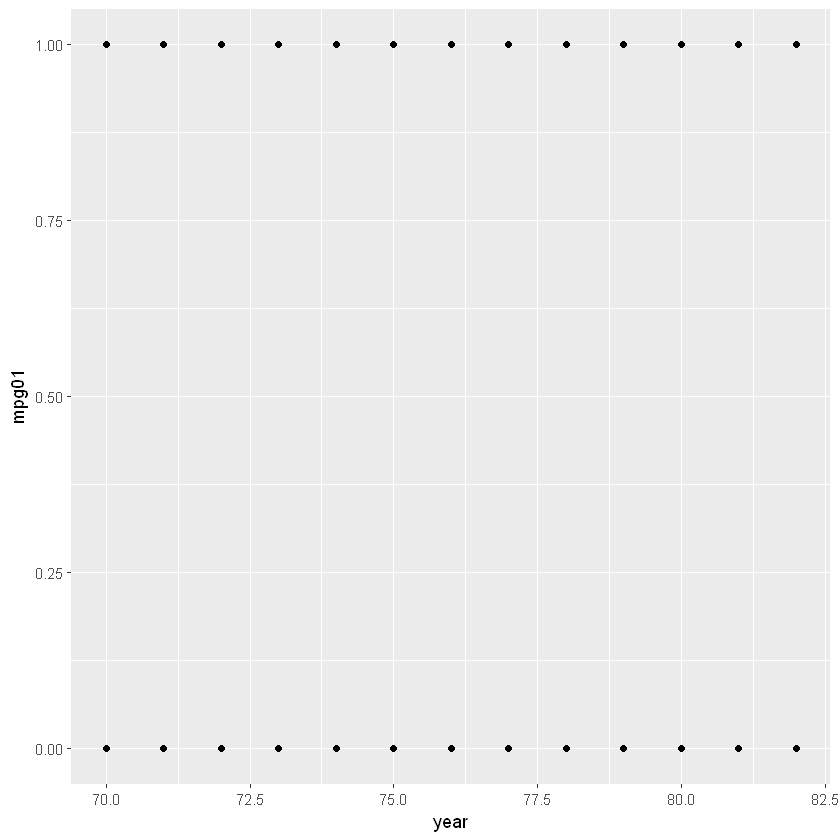

In [312]:
Auto %>%
ggplot(aes(year, mpg01)) +
geom_point()

In [319]:
cor(Auto[,-9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


In [322]:
m7 <- glm(mpg01 ~ year, family = binomial, data = Auto1)
summary(m7)


Call:
glm(formula = mpg01 ~ year, family = binomial, data = Auto1)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.88994  -0.96401  -0.00187   0.95881   1.88399  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -20.20537    2.53754  -7.963 1.68e-15 ***
year          0.26595    0.03337   7.969 1.59e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 543.43  on 391  degrees of freedom
Residual deviance: 466.32  on 390  degrees of freedom
AIC: 470.32

Number of Fisher Scoring iterations: 4
